In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Approximations by Series Expansions

The nonparametric methods described thus far suffer from the requirement that, in general, all of the samples must be stored, or the designer must have extensive knowledge of the problem. Since a large number of samples is needed to obtain good estimates, the memory requirements can be severe. In addition, considerable computation time may be required each time one of the methods is used to estimate $ p(x) $ or classify a new $ x $.

In certain circumstances, the Parzen-window procedure can be modified to reduce these problems considerably. The basic idea is to approximate the window function by a finite series expansion that is acceptably accurate in the region of interest. If we are fortunate and can find two sets of functions $ \psi_j(x) $ and $ \chi_j(x) $ that allow the expansion:

$$
\phi(x - x_i) = \sum_{j=1}^m a_j \psi_j(x) \chi_j(x_i),
$$

we can split the dependence upon \( x \) and \( x_i \) as:

$$
\phi(x - x_i) = \sum_{j=1}^m a_j \psi_j(x) \chi_j(x_i).
$$

Then from Eq. 11, we have:

$$
p_n(x) = \sum_{j=1}^m b_j \psi_j(x),
$$

where

$$
b_j = \sum_{i=1}^n \chi_j(x_i).
$$

If a sufficiently accurate expansion can be obtained with a reasonable value for $ m $, this approach has some obvious advantages. The information in the $ n $ samples is reduced to the $ m $ coefficients $ b_j $. If additional samples are obtained, Eq. 69 for $ b_j $ can be updated easily, and the number of coefficients remains unchanged.

If the functions $ \psi_j(\cdot) $ and $ \chi_j(\cdot) $ are polynomial functions of the components of $ x $ and $ x_i $, the expression for the estimate $ p_n(x) $ is also a polynomial, which can be computed relatively efficiently. Furthermore, use of this estimate $ p(x|\omega_i)P(\omega_i) $ leads to a simple polynomial way of obtaining polynomial discriminant functions.

Before becoming too enthusiastic, however, we should note one of the problems with this approach. A key property of a useful window function is its tendency to peak at the origin and fade away elsewhere. Thus, $ \phi((x - x_i)/h_n) $ should peak sharply at $ x = x_i $, and contribute little to the approximation of $ p_n(x) $ for $ x $ far from $ x_i $. Unfortunately, polynomials have the annoying property of becoming unbounded. Thus, in a polynomial expansion, we might find the terms associated with an $ x_i $ far from $ x $ contributing most (rather than least) to the expansion. 

It is quite important, therefore, to be sure that the expansion of each window function is in fact accurate in the region of interest, and this may well require a large number of terms.

There are many types of series expansions one might consider. Readers familiar with the concept of eigenfunctions can express $ \phi(x, x_i) $ as a series of eigenfunctions. (In analogy with eigenvectors and eigenvalues, eigenfunctions are solutions to certain differential equations with fixed real-number coefficients.) Rather than computing eigenfunctions, one might choose any reasonable set of functions orthogonal over the region of interest and obtain a least-squares fit to the window function.

We shall take an even more straightforward approach and expand the window function in a Taylor series. For simplicity, we conﬁne our attention to a one-dimensional example using a Gaussian window function:

$$
\phi(u) = \frac{1}{\sqrt{2\pi}} e^{-u^2 / 2}.
$$

The Taylor series expansion is given by:

$$
\phi(u) = \frac{1}{\sqrt{2\pi}} \sum_{j=0}^{m-1} \frac{(-1)^j u^{2j}}{j!}.
$$

This expansion is most accurate near $ u = 0 $ and is in error by less than $ \frac{u^{2m}}{m!} $. If we substitute $ u = \frac{x - x_i}{h} $, we obtain a polynomial of degree $ 2(m - 1) $ in $ x $ and $ x_i $. For example, if $ m = 2 $, the window function can be approximated as:

$$
\phi\left( \frac{x - x_i}{h} \right) = 1 - \frac{(x - x_i)^2}{h^2}.
$$

Thus, we have:

$$
p_n(x) = \sum_{i=1}^{n} \phi\left( \frac{x - x_i}{h} \right) = \sum_{i=1}^{n} \left( b_0 + b_1 x + b_2 x^2 \right),
$$

where the coefficients are:

$$
b_0 = \frac{1}{h} \sum_{i=1}^n \left( 1 - \frac{(x - x_i)^2}{h^2} \right),
$$

$$
b_1 = \frac{1}{h^3} \sum_{i=1}^n x_i,
$$

$$
b_2 = -\frac{1}{h^3} \sum_{i=1}^n x_i^2.
$$

This simple expansion condenses the information in $ n $ samples into the values $ b_0 $, $ b_1 $, and $ b_2 $. It is accurate if the largest value of $ |x - x_i| $ is not greater than $ h $. Unfortunately, this restricts us to a very wide window that is not capable of much resolution. By taking more terms, we can use a narrower window.

If we let $ r $ be the largest value of $ |x - x_i| $ and use the fact that the error is less than $ \frac{r^{2m}}{m!} $, we can use Stirling’s approximation for $ m! $ to find that the error in approximating $ p_n(x) $ is less than:

$$
\text{Error} \sim \frac{r^{2m}}{h^{2m} m!} \quad \text{for large } m.
$$

Thus, the error becomes small only when $ m > e(r/h)^2 $. This implies the need for distant samples. Although this example is rudimentary, similar considerations arise in the multidimensional case even when more sophisticated expansions are used, and the procedure is most attractive when the window size is relatively large.

### Gaussian Window Function and Its Taylor Series Expansion

The Gaussian window function is given by:

$$
\phi(u) = \frac{1}{\sqrt{2\pi}} e^{-u^2/2}
$$

The Taylor series expansion of the Gaussian window function around $ u = 0 $ is:

$$
\phi(u) = \frac{1}{\sqrt{2\pi}} \left( 1 - \frac{u^2}{2} + \frac{u^4}{24} - \cdots \right)
$$

### Substituting $ u = \frac{x - x_i}{h} $

Substituting $ u = \frac{x - x_i}{h} $, we obtain the following approximation for the Gaussian window function:

$$
\phi\left( \frac{x - x_i}{h} \right) = \frac{1}{\sqrt{2\pi}} \left( 1 - \frac{(x - x_i)^2}{h^2} \right)
$$

For higher-order expansions, we get more terms involving powers of $ x $ and $ x_i $.

### Density Estimation

The density estimate $ p_n(x) $ is given by:

$$
p_n(x) = \frac{1}{n h} \sum_{i=1}^{n} \phi\left( \frac{x - x_i}{h} \right)
$$

Expanding the Gaussian function in the Taylor series gives:

$$
p_n(x) = \frac{1}{n h} \sum_{i=1}^{n} \left[ b_0 + b_1 x + b_2 x^2 + \cdots \right]
$$

Where the coefficients $ b_0, b_1, b_2, \dots $ are obtained from the Taylor expansion of the Gaussian function. For example, for $ m = 2 $, the coefficients are:

$$
b_0 = \frac{1}{h} \sum_{i=1}^{n} 1, \quad b_1 = \frac{1}{h^3} \sum_{i=1}^{n} x_i, \quad b_2 = -\frac{1}{h^3} \sum_{i=1}^{n} x_i^2
$$

### Error in the Approximation

The error in the approximation of the density is given by:

$$
\text{Error} < \left( \frac{r}{h} \right)^{2m} \frac{m!}{h^m}
$$

Where $ r $ is the largest distance between $ x $ and any $ x_i $, and $ m $ is the order of the Taylor expansion.

### Conclusion

The Taylor series expansion allows us to approximate the nonparametric density estimate efficiently. However, when the window size $ h $ is small compared to the distance between $ x $ and $ x_i $, a larger number of terms $ m $ is needed for accurate approximation.



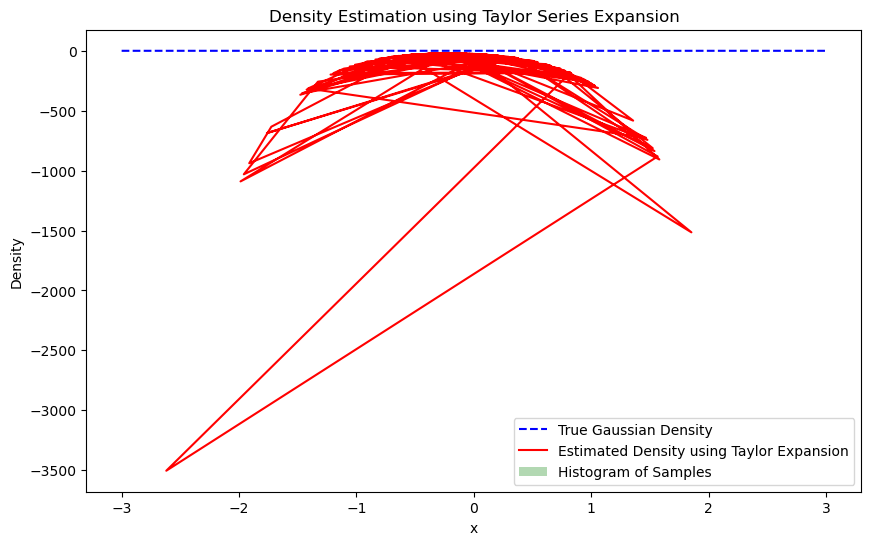

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian window function
def gaussian(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

# Taylor series expansion of Gaussian function
def taylor_expansion_gaussian(x, xi, h, m):
    u = (x - xi) / h
    result = 1
    for j in range(1, m):
        result += (-1)**j * (u**(2 * j)) / np.math.factorial(j)
    return (1 / np.sqrt(2 * np.pi)) * result

# Compute the density using the Taylor approximation of Gaussian
def estimate_density(X, h, m):
    n = len(X)
    density_estimate = np.zeros(len(X))
    for i in range(len(X)):
        for j in range(n):
            density_estimate[i] += taylor_expansion_gaussian(X[i], X[j], h, m)
    return density_estimate / n

# Example usage with random samples
np.random.seed(42)
n_samples = 100
X = np.random.normal(0, 1, n_samples)  # Generate normal distributed samples

# Parameters for the Taylor expansion and density estimation
h = 0.5  # bandwidth parameter
m = 4    # order of Taylor series

# Estimate density using the Taylor expansion
density = estimate_density(X, h, m)

# Plot the true density and estimated density
x_values = np.linspace(-3, 3, 500)
true_density = gaussian(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, true_density, label='True Gaussian Density', color='b', linestyle='--')
plt.plot(X, density, label='Estimated Density using Taylor Expansion', color='r')
plt.hist(X, bins=20, density=True, alpha=0.3, color='g', label='Histogram of Samples')
plt.legend()
plt.title('Density Estimation using Taylor Series Expansion')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()


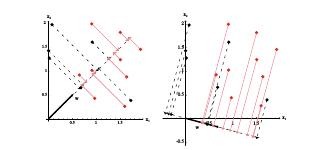

Fig.27: Projection of samples onto two diﬀerent lines. The ﬁgure on the right shows greater separation between the red and black projected points.

### Fisher's Linear Discriminant: Detailed Formulation

We continue from the previous steps, now focusing on the scatter matrices and the generalized Rayleigh quotient.

#### Step 1: Within-Class Scatter Matrix

The within-class scatter for the projected points can be expressed as:

$$
\tilde{s}_i^2 = \sum_{x \in D_i} (w^T \mathbf{x} - w^T \mathbf{m}_i)^2 = w^T \sum_{x \in D_i} (\mathbf{x} - \mathbf{m}_i)(\mathbf{x} - \mathbf{m}_i)^T w = w^T S_i w
$$

Thus, the total within-class scatter for both classes is:

$$
\tilde{s}_1^2 + \tilde{s}_2^2 = w^T S_W w
$$

where $ S_W = S_1 + S_2 $ is the total within-class scatter matrix.

#### Step 2: Between-Class Scatter Matrix

The separation of the projected means can be written as:

$$
(\tilde{m}_1 - \tilde{m}_2)^2 = (w^T \mathbf{m}_1 - w^T \mathbf{m}_2)^2 = w^T (\mathbf{m}_1 - \mathbf{m}_2)(\mathbf{m}_1 - \mathbf{m}_2)^T w = w^T S_B w
$$

where $ S_B = (\mathbf{m}_1 - \mathbf{m}_2)(\mathbf{m}_1 - \mathbf{m}_2)^T $ is the between-class scatter matrix.

#### Step 3: Fisher's Criterion Function

The Fisher criterion function can now be written as:

$$
J(\mathbf{w}) = \frac{w^T S_B w}{w^T S_W w}
$$

This is known as the generalized Rayleigh quotient. To maximize this criterion, we must find $ \mathbf{w} $ that satisfies the equation:

$$
S_B \mathbf{w} = \lambda S_W \mathbf{w}
$$

for some constant $ \lambda $, which is a generalized eigenvalue problem.

#### Step 4: Eigenvalue Problem and Solution

If $ S_W $ is nonsingular, we can rewrite this as a conventional eigenvalue problem:

$$
S_W^{-1} S_B \mathbf{w} = \lambda \mathbf{w}
$$

The solution $ \mathbf{w} $ that maximizes $ J(\mathbf{w}) $ is given by:

$$
\mathbf{w} = S_W^{-1} (\mathbf{m}_1 - \mathbf{m}_2)
$$

This gives us the optimal projection direction $ \mathbf{w} $ for Fisher's Linear Discriminant.

#### Step 5: Classification and Decision Boundary

The class projection is now one-dimensional, and classification is based on the projected values of the samples. When the conditional densities $ p(x | \omega_i) $ are multivariate normal with equal covariance matrices $ \Sigma $, the optimal decision boundary is:

$$
w^T \mathbf{x} + w_0 = 0
$$

where:

$$
\mathbf{w} = \Sigma^{-1} (\mu_1 - \mu_2)
$$

and $ w_0 $ is a constant involving $ \mathbf{w} $ and the prior probabilities.

#### Step 6: Computational Complexity

The computational complexity for finding the optimal $ \mathbf{w} $ using Fisher's Linear Discriminant is dominated by the calculation of the within-class scatter matrix and its inverse, which is an $ O(d^2 n) $ operation.


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

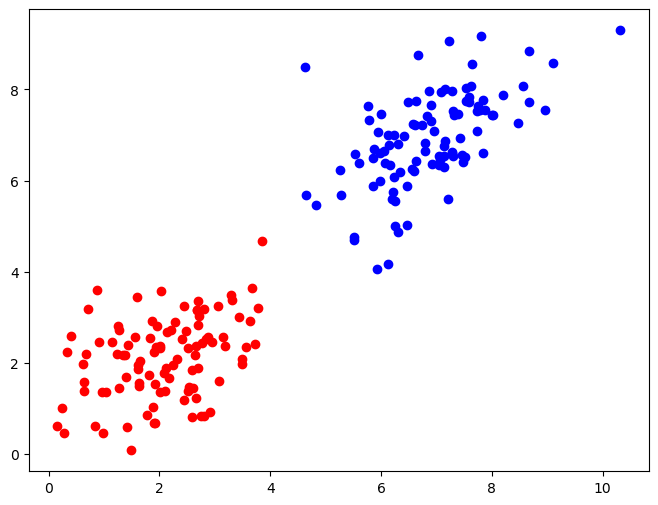

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate some example data (for binary classification)
np.random.seed(42)
n_samples = 100
n_features = 2

# Generate two classes with different means and the same covariance
class_1 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], n_samples)
class_2 = np.random.multivariate_normal([7, 7], [[1, 0.5], [0.5, 1]], n_samples)

# Combine the data into a single dataset
X = np.vstack((class_1, class_2))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Step 2: Compute the mean vectors for each class
mean_1 = np.mean(class_1, axis=0)
mean_2 = np.mean(class_2, axis=0)

# Step 3: Compute the within-class scatter matrix S_W
S_W = np.zeros((n_features, n_features))

for i in range(n_samples):
    S_W += np.outer(class_1[i] - mean_1, class_1[i] - mean_1)
    S_W += np.outer(class_2[i] - mean_2, class_2[i] - mean_2)

# Step 4: Compute the between-class scatter matrix S_B
S_B = np.outer(mean_1 - mean_2, mean_1 - mean_2)

# Step 5: Solve for the optimal projection vector w
w = np.linalg.inv(S_W).dot(mean_1 - mean_2)

# Step 6: Project the data onto the linear discriminant
X_proj = X.dot(w)

# Step 7: Classification - Apply threshold (here, we assume zero threshold for simplicity)
threshold = 0
y_pred = (X_proj >= threshold).astype(int)

# Step 8: Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:n_samples, 0], X[:n_samples, 1], color='red', label='Class 1')
plt.scatter(X[n_samples:, 0], X[n_samples:, 1], color='blue', label='Class 2')

# Plot the projection line
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

xx = np.linspace(x_min, x_max, 100)
yy = np.linspace(y_min, y_max, 100)

# Project onto the line in the direction of w
line_points = np.array([xx, yy]).T.dot(w)
plt.plot(line_points[:, 0], line_points[:, 1], 'k--', label="Linear Discriminant")

plt.title("Fisher's Linear Discriminant")
plt.legend(loc='upper left')
plt.show()


## Multiple Discriminant Analysis (MDA)

Multiple Discriminant Analysis (MDA) is an extension of Fisher's Linear Discriminant Analysis (LDA) that works for classification problems with more than two classes. In the case of a **c-class problem**, MDA reduces the data to a $(c - 1)$-dimensional space.

### 1. Class-wise Means and Total Mean Vector

Let $ X = \{x_1, x_2, \dots, x_n\} $ be the set of all samples, where each $ x_i \in \mathbb{R}^d $ and $ y_i \in \{1, 2, \dots, c\} $ denotes the class label for each sample. The **class-wise mean** vector for class $ i $ is given by:

$$
m_i = \frac{1}{n_i} \sum_{x \in D_i} x
$$

where $ n_i $ is the number of samples in class $ i $, and $ D_i $ is the set of samples in class $ i $.

The **total mean** vector $ m $ is:

$$
m = \frac{1}{n} \sum_{i=1}^{c} n_i m_i
$$

### 2. Scatter Matrices

- The **within-class scatter matrix** $ S_W $ is defined as:

$$
S_W = \sum_{i=1}^{c} S_i = \sum_{i=1}^{c} \sum_{x \in D_i} (x - m_i)(x - m_i)^T
$$

- The **between-class scatter matrix** $ S_B $ is defined as:

$$
S_B = \sum_{i=1}^{c} n_i (m_i - m)(m_i - m)^T
$$

- The **total scatter matrix** $ S_T $ is the sum of the within-class and between-class scatter matrices:

$$
S_T = S_W + S_B
$$

### 3. Projection and Optimization

The goal of MDA is to find a projection matrix $ W $ that maximizes the ratio of the determinant of the between-class scatter matrix to the within-class scatter matrix:

$$
J(W) = \frac{|W^T S_B W|}{|W^T S_W W|}
$$

This optimization leads to the **generalized eigenvalue problem**:

$$
S_B W = \lambda S_W W
$$

The solution to this eigenvalue problem gives us the optimal projection matrix $ W $, whose columns are the **generalized eigenvectors** corresponding to the largest eigenvalues.

### 4. Projection of Data

Once the optimal projection matrix $ W $ is found, the data can be projected onto a lower-dimensional space:

$$
y = W^T x
$$

where $ y $ is the data projected onto the $(c - 1)$-dimensional subspace.

### 5. Python Code Implementation



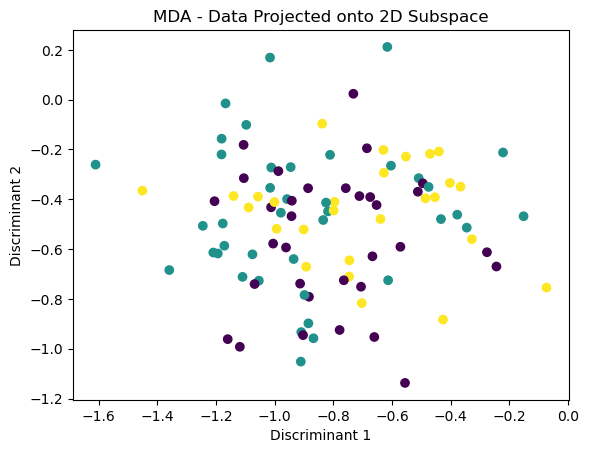

In [4]:
#Here is the Python code for Multiple Discriminant Analysis (MDA):

#```python
import numpy as np
from numpy.linalg import inv, eig
import matplotlib.pyplot as plt

def multiple_discriminant_analysis(X, y, num_classes):
    """
    Implements Multiple Discriminant Analysis (MDA) for dimensionality reduction.
    
    Parameters:
    X (ndarray): Data matrix of shape (n_samples, n_features).
    y (ndarray): Labels of shape (n_samples,) with integer class labels.
    num_classes (int): The number of classes (c).
    
    Returns:
    W (ndarray): The projection matrix of shape (n_features, c-1).
    X_projected (ndarray): The data projected onto the c-1 dimensional subspace.
    """
    # Compute class means
    n_samples, n_features = X.shape
    means = np.array([X[y == i].mean(axis=0) for i in range(num_classes)])

    # Compute the total mean
    m = X.mean(axis=0)

    # Compute the within-class scatter matrix (S_W)
    S_W = np.zeros((n_features, n_features))
    for i in range(num_classes):
        class_scatter = np.cov(X[y == i].T, bias=True)
        S_W += class_scatter * len(X[y == i])

    # Compute the between-class scatter matrix (S_B)
    S_B = np.zeros((n_features, n_features))
    for i in range(num_classes):
        n_i = len(X[y == i])
        diff = (means[i] - m).reshape(n_features, 1)
        S_B += n_i * diff @ diff.T

    # Solve the generalized eigenvalue problem S_B * w = lambda * S_W * w
    eigvals, eigvecs = eig(inv(S_W) @ S_B)
    
    # Sort the eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]

    # Select the top (c-1) eigenvectors to form the projection matrix
    W = eigvecs[:, :num_classes - 1]

    # Project the data onto the new subspace
    X_projected = X.dot(W)

    return W, X_projected

# Example usage
# Assume `X` is the dataset and `y` contains the class labels.
# For instance, in a 3-class problem (c=3) with data `X` of shape (n_samples, n_features):

num_classes = 3
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.choice([0, 1, 2], 100)  # Random class labels (3 classes)

W, X_projected = multiple_discriminant_analysis(X, y, num_classes)

# Plot the data projected onto the first 2 discriminant components (for 3 or more classes)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('MDA - Data Projected onto 2D Subspace')
plt.show()


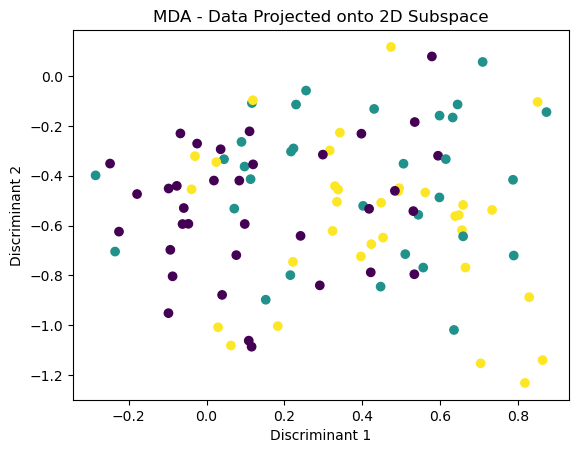

In [3]:
import numpy as np
from numpy.linalg import inv, eig
import matplotlib.pyplot as plt

def multiple_discriminant_analysis(X, y, num_classes):
    """
    Implements Multiple Discriminant Analysis (MDA) for dimensionality reduction.
    
    Parameters:
    X (ndarray): Data matrix of shape (n_samples, n_features).
    y (ndarray): Labels of shape (n_samples,) with integer class labels.
    num_classes (int): The number of classes (c).
    
    Returns:
    W (ndarray): The projection matrix of shape (n_features, c-1).
    X_projected (ndarray): The data projected onto the c-1 dimensional subspace.
    """
    # Compute class means
    n_samples, n_features = X.shape
    means = np.array([X[y == i].mean(axis=0) for i in range(num_classes)])

    # Compute the total mean
    m = X.mean(axis=0)

    # Compute the within-class scatter matrix (S_W)
    S_W = np.zeros((n_features, n_features))
    for i in range(num_classes):
        class_scatter = np.cov(X[y == i].T, bias=True)
        S_W += class_scatter * len(X[y == i])

    # Compute the between-class scatter matrix (S_B)
    S_B = np.zeros((n_features, n_features))
    for i in range(num_classes):
        n_i = len(X[y == i])
        diff = (means[i] - m).reshape(n_features, 1)
        S_B += n_i * diff @ diff.T

    # Solve the generalized eigenvalue problem S_B * w = lambda * S_W * w
    eigvals, eigvecs = eig(inv(S_W) @ S_B)
    
    # Sort the eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]

    # Select the top (c-1) eigenvectors to form the projection matrix
    W = eigvecs[:, :num_classes - 1]

    # Project the data onto the new subspace
    X_projected = X.dot(W)

    return W, X_projected

# Example usage
# Assume `X` is the dataset and `y` contains the class labels.
# For instance, in a 3-class problem (c=3) with data `X` of shape (n_samples, n_features):

num_classes = 3
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.choice([0, 1, 2], 100)  # Random class labels (3 classes)

W, X_projected = multiple_discriminant_analysis(X, y, num_classes)

# Plot the data projected onto the first 2 discriminant components (for 3 or more classes)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('MDA - Data Projected onto 2D Subspace')
plt.show()


## Multiple Discriminant Analysis (MDA) - Advanced Formulation

In Multiple Discriminant Analysis (MDA), we transform the data into a lower-dimensional subspace in order to maximize the separation between the classes. After the projection, the samples $ x_1, x_2, \dots, x_n $ project to a corresponding set of samples $ y_1, y_2, \dots, y_n $, and we can describe their mean vectors and scatter matrices in the new lower-dimensional space.

### 1. Projected Class-wise Mean and Scatter Matrices

For the projection $ y = W^T x $, the class-wise means and scatter matrices in the projected space are defined as:

- The **projected class mean** $ \tilde{m}_i $ for class $ i $ is:

$$
\tilde{m}_i = \frac{1}{n_i} \sum_{y \in Y_i} y
$$

- The **total projected mean** $ \tilde{m} $ is:

$$
\tilde{m} = \frac{1}{n} \sum_{i=1}^{c} n_i \tilde{m}_i
$$

The **within-class scatter matrix** in the projected space $ \tilde{S}_W $ is:

$$
\tilde{S}_W = \sum_{i=1}^{c} \sum_{y \in Y_i} (y - \tilde{m}_i)(y - \tilde{m}_i)^T
$$

The **between-class scatter matrix** in the projected space $ \tilde{S}_B $ is:

$$
\tilde{S}_B = \sum_{i=1}^{c} n_i (\tilde{m}_i - \tilde{m})(\tilde{m}_i - \tilde{m})^T
$$

### 2. Transformation of Scatter Matrices

By projecting the data to the lower-dimensional space, the within-class and between-class scatter matrices transform as:

$$
\tilde{S}_W = W^T S_W W
$$

$$
\tilde{S}_B = W^T S_B W
$$

These equations show how the scatter matrices $ S_W $ and $ S_B $ are transformed by the projection matrix $ W $.

### 3. Optimization Criterion

We aim to find a transformation matrix $ W $ that maximizes the ratio of the determinant of the between-class scatter matrix to the within-class scatter matrix:

$$
J(W) = \frac{|W^T S_B W|}{|W^T S_W W|}
$$

This criterion function $ J(W) $ seeks to maximize the separation between the classes while minimizing the within-class scatter in the projected space.

### 4. Generalized Eigenvalue Problem

To solve this problem, we need to find the eigenvectors and eigenvalues of the generalized eigenvalue problem:

$$
S_B W = \lambda S_W W
$$

Alternatively, this can be written as the characteristic polynomial:

$$
|S_B - \lambda_i S_W| = 0
$$

### 5. Key Observations

- Since $ S_B $ is the sum of $ c $ rank-1 matrices, the rank of $ S_B $ is at most $ c-1 $. Therefore, no more than $ c-1 $ eigenvalues will be non-zero.
- The solution matrix $ W $ contains the eigenvectors corresponding to the largest eigenvalues of the generalized eigenvalue problem.

If the within-class scatter matrix $ S_W $ is isotropic, the eigenvectors are simply the eigenvectors of $ S_B $, and the eigenvectors with non-zero eigenvalues span the space spanned by the vectors $ m_i - m $.

### 6. Non-Uniqueness of Solution

The solution for $ W $ is not unique. The transformation includes rotations and scalings of the axes in the lower-dimensional subspace. These transformations do not change the criterion function $ J(W) $ and, therefore, do not affect the final classification.

### 7. Visualizing the Projection

In the case of three classes, the data is projected onto a two-dimensional subspace, and the result can be visualized as shown in the figure below:

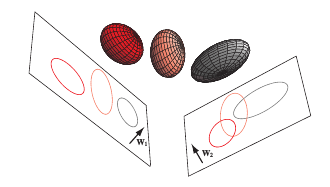

Fi.28: Three three-dimensional distributions are projected onto two-dimensional subspaces, described by a normal vectors w1 and w2 . Informally, multiple discrimi- nant methods seek the optimum such subspace, i.e., the one with the greatest sepa- ration of the projected distributions for a given total within-scatter matrix, here as associated with w1 .

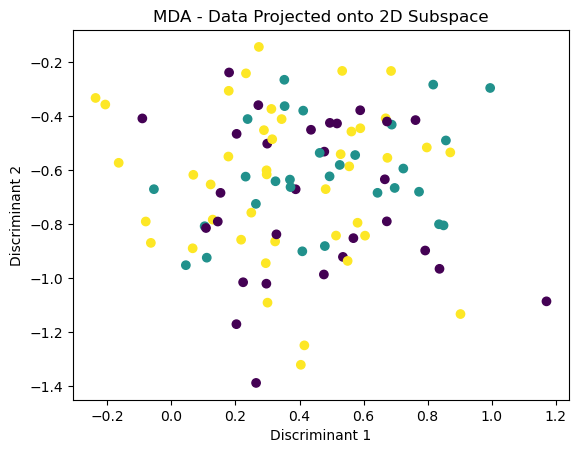

In [5]:
### 8. Python Code Implementation

#Here is an implementation of MDA in Python:

#```python
import numpy as np
from numpy.linalg import inv, eig
import matplotlib.pyplot as plt

def multiple_discriminant_analysis(X, y, num_classes):
    """
    Implements Multiple Discriminant Analysis (MDA) for dimensionality reduction.
    
    Parameters:
    X (ndarray): Data matrix of shape (n_samples, n_features).
    y (ndarray): Labels of shape (n_samples,) with integer class labels.
    num_classes (int): The number of classes (c).
    
    Returns:
    W (ndarray): The projection matrix of shape (n_features, c-1).
    X_projected (ndarray): The data projected onto the c-1 dimensional subspace.
    """
    # Compute class means
    n_samples, n_features = X.shape
    means = np.array([X[y == i].mean(axis=0) for i in range(num_classes)])

    # Compute the total mean
    m = X.mean(axis=0)

    # Compute the within-class scatter matrix (S_W)
    S_W = np.zeros((n_features, n_features))
    for i in range(num_classes):
        class_scatter = np.cov(X[y == i].T, bias=True)
        S_W += class_scatter * len(X[y == i])

    # Compute the between-class scatter matrix (S_B)
    S_B = np.zeros((n_features, n_features))
    for i in range(num_classes):
        n_i = len(X[y == i])
        diff = (means[i] - m).reshape(n_features, 1)
        S_B += n_i * diff @ diff.T

    # Solve the generalized eigenvalue problem S_B * w = lambda * S_W * w
    eigvals, eigvecs = eig(inv(S_W) @ S_B)
    
    # Sort the eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]

    # Select the top (c-1) eigenvectors to form the projection matrix
    W = eigvecs[:, :num_classes - 1]

    # Project the data onto the new subspace
    X_projected = X.dot(W)

    return W, X_projected

# Example usage
# Assume `X` is the dataset and `y` contains the class labels.
# For instance, in a 3-class problem (c=3) with data `X` of shape (n_samples, n_features):

num_classes = 3
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.choice([0, 1, 2], 100)  # Random class labels (3 classes)

W, X_projected = multiple_discriminant_analysis(X, y, num_classes)

# Plot the data projected onto the first 2 discriminant components (for 3 or more classes)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('MDA - Data Projected onto 2D Subspace')
plt.show()
